In [83]:
import pandas as pd
import plotly.express as px

In [2]:
us2020_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2020.csv"
us2020_cases = pd.read_csv(us2020_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])
us2021_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2021.csv"
us2021_cases = pd.read_csv(us2021_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [3]:
us2022_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-2022.csv"
us2022_cases = pd.read_csv(us2022_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [4]:

recent_url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties-recent.csv"
recent_cases = pd.read_csv(recent_url, usecols=['date', 'county', 'state', 'cases', 'deaths'])

In [5]:
us2020_cases.tail()

,date,county,state,cases,deaths
884732,2020-12-31,Sweetwater,Wyoming,2966,16.0
884733,2020-12-31,Teton,Wyoming,2138,4.0
884734,2020-12-31,Uinta,Wyoming,1558,7.0
884735,2020-12-31,Washakie,Wyoming,780,19.0
884736,2020-12-31,Weston,Wyoming,476,2.0


In [6]:
us2020_cases["deaths"] = us2020_cases["deaths"].fillna(0)
us2020_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [7]:
us2021_cases.tail()

,date,county,state,cases,deaths
1185368,2021-12-31,Sweetwater,Wyoming,8320,107.0
1185369,2021-12-31,Teton,Wyoming,5950,14.0
1185370,2021-12-31,Uinta,Wyoming,4154,31.0
1185371,2021-12-31,Washakie,Wyoming,1879,37.0
1185372,2021-12-31,Weston,Wyoming,1254,14.0


In [8]:
us2021_cases["deaths"] = us2021_cases["deaths"].fillna(0)
us2021_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [9]:
us2022_cases.tail()

,date,county,state,cases,deaths
1188039,2022-12-31,Sweetwater,Wyoming,12410,136.0
1188040,2022-12-31,Teton,Wyoming,12010,16.0
1188041,2022-12-31,Uinta,Wyoming,6305,43.0
1188042,2022-12-31,Washakie,Wyoming,2721,47.0
1188043,2022-12-31,Weston,Wyoming,1880,22.0


In [10]:
us2022_cases["deaths"] = us2022_cases["deaths"].fillna(0)
us2022_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [11]:
recent_cases.tail()

,date,county,state,cases,deaths
97593,2023-01-01,Sweetwater,Wyoming,12410,136.0
97594,2023-01-01,Teton,Wyoming,12010,16.0
97595,2023-01-01,Uinta,Wyoming,6305,43.0
97596,2023-01-01,Washakie,Wyoming,2721,47.0
97597,2023-01-01,Weston,Wyoming,1880,22.0


In [12]:
recent_cases["deaths"] = recent_cases["deaths"].fillna(0)
recent_cases.isna().sum()

date      0
county    0
state     0
cases     0
deaths    0
dtype: int64

In [113]:
#Population
population = pd.read_csv("data/popest2020-2022.csv", usecols=['STATE', 'NAME', 'POPESTIMATE2020', 'POPESTIMATE2021', 'POPESTIMATE2022'])

population = population.loc[population['STATE']!=0] #FILTER TO GET STATE ONLY
population = population.drop(columns=['STATE']) #DROP STATE NUMBER
population = population.rename(columns={"POPESTIMATE2020": "2020", "POPESTIMATE2021": "2021", "POPESTIMATE2022": "2022"})

population.head()

,NAME,2020,2021,2022
14,Alabama,5031362,5049846,5074296
15,Alaska,732923,734182,733583
16,Arizona,7179943,7264877,7359197
17,Arkansas,3014195,3028122,3045637
18,California,39501653,39142991,39029342


In [14]:
## Unpivot the data
date_columns = population.columns[1:]
id_vars_columns = population.columns[:1]
population_unpivoted = population.melt(id_vars=id_vars_columns, value_vars=date_columns, var_name='year', value_name='population')


In [15]:
population_unpivoted

,NAME,year,population
0,Alabama,2020,5031362
1,Alaska,2020,732923
2,Arizona,2020,7179943
3,Arkansas,2020,3014195
4,California,2020,39501653
...,...,...,...
151,Washington,2022,7785786
152,West Virginia,2022,1775156
153,Wisconsin,2022,5892539
154,Wyoming,2022,581381


In [114]:
# Save the DataFrame to a CSV file
population.to_csv('data/estimated_population.csv', index=False)


In [115]:
pop_df = pd.read_csv('data/estimated_population.csv')
pop_df.head()

,NAME,2020,2021,2022
0,Alabama,5031362,5049846,5074296
1,Alaska,732923,734182,733583
2,Arizona,7179943,7264877,7359197
3,Arkansas,3014195,3028122,3045637
4,California,39501653,39142991,39029342


In [116]:
pop_df.isna().sum()

NAME    0
2020    0
2021    0
2022    0
dtype: int64

In [117]:
us2020_date = us2020_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2020_state = us2020_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()

us2021_date = us2021_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2021_state = us2021_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()

us2022_date = us2022_cases.groupby(["date"])[["cases","deaths"]].sum().reset_index()
us2022_state = us2022_cases.groupby(["date", "state"])[["cases","deaths"]].sum().reset_index()


In [20]:
us_date_df = pd.concat([us2020_date, us2021_date, us2022_date])
us_state_df = pd.concat([us2020_state, us2021_state, us2022_state])

In [21]:
us_state_df

,date,state,cases,deaths
0,2020-01-21,Washington,1,0.0
1,2020-01-22,Washington,1,0.0
2,2020-01-23,Washington,1,0.0
3,2020-01-24,Illinois,1,0.0
4,2020-01-24,Washington,1,0.0
...,...,...,...,...
20435,2022-12-31,Virginia,2205518,22793.0
20436,2022-12-31,Washington,1883676,15067.0
20437,2022-12-31,West Virginia,624721,7795.0
20438,2022-12-31,Wisconsin,1960884,15860.0


In [22]:
us_date_df ['date'] = pd.to_datetime(us_date_df['date'])
us_state_df ['date'] = pd.to_datetime(us_state_df['date'])

In [118]:
#add year column
us_state_df['year'] = us_state_df['date'].dt.year
us_date_df['year'] = us_date_df['date'].dt.year

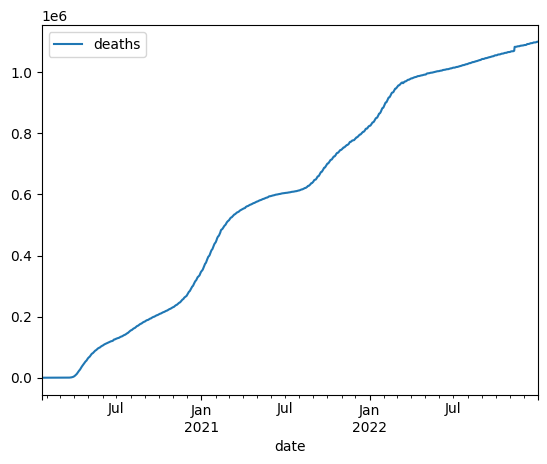

In [119]:
import matplotlib.pyplot as plt

# Select the 'Year' and 'Sales' columns
dff = us_date_df[['date', 'deaths']]

# Plot the 'Year' and 'Sales' columns
dff.plot(x='date', y='deaths')

# Show the plot
plt.show()

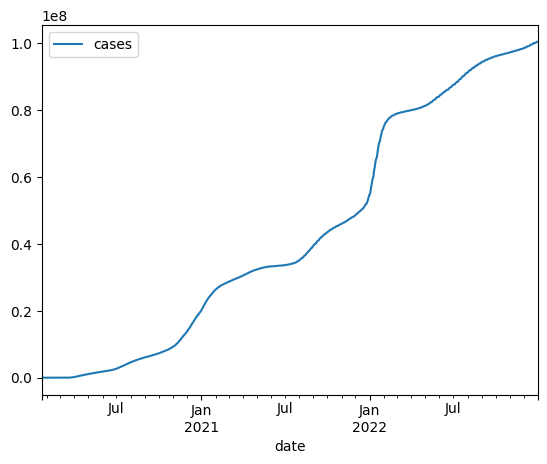

In [120]:
# Select the 'Year' and 'Sales' columns
dff = us_date_df[['date', 'cases']]

# Plot the 'Year' and 'Sales' columns
dff.plot(x='date', y='cases')

# Show the plot
plt.show()

# Data to show

In [121]:
#Last update date
last_update= us_date_df["date"].iloc[-1].strftime('%Y-%m-%d')
last_update

'2022-12-31'

In [122]:
us_date_df.tail()

,date,cases,deaths,year
360,2022-12-27,100198218,1097812.0,2022
361,2022-12-28,100321148,1098651.0,2022
362,2022-12-29,100440391,1099302.0,2022
363,2022-12-30,100473647,1099824.0,2022
364,2022-12-31,100479169,1099837.0,2022


In [123]:
#Global cases
global_cases = us_date_df["cases"].iloc[-1]
global_cases

100479169

In [124]:
#Global deaths
global_deaths = us_date_df["deaths"].iloc[-1]
global_deaths

1099837.0

In [125]:
#Global CFR
CFR = round(global_deaths/global_cases, 2)
CFR

0.01

In [128]:
#Global Attack Rate
population_2022 = pop_df['2022'].sum()
attack_rate = round(global_cases/population_2022, 2)
attack_rate


0.3

# Data by State

In [54]:
us_state_df.tail()

,date,state,cases,deaths,year
20435,2022-12-31,Virginia,2205518,22793.0,2022
20436,2022-12-31,Washington,1883676,15067.0,2022
20437,2022-12-31,West Virginia,624721,7795.0,2022
20438,2022-12-31,Wisconsin,1960884,15860.0,2022
20439,2022-12-31,Wyoming,182847,1959.0,2022


In [56]:
#filter by state
state = 'Wyoming'
df_state = us_state_df.loc[us_state_df['state']==state]


In [57]:
# state cases
state_cases = df_state["cases"].iloc[-1]
state_cases

182847

In [58]:
#state deaths
state_deaths = df_state["deaths"].iloc[-1]
state_deaths

1959.0

In [59]:
#state CFR
state_CFR = round(state_deaths/state_cases, 2)
state_CFR

0.01

In [129]:
pop_df.tail()

,NAME,2020,2021,2022
47,Washington,7724031,7740745,7785786
48,West Virginia,1791420,1785526,1775156
49,Wisconsin,5896271,5880101,5892539
50,Wyoming,577605,579483,581381
51,Puerto Rico,3281557,3262693,3221789


In [133]:
#state attack rate
population_state_2022 = pop_df.loc[(pop_df['NAME'] == state),'2022']
state_attack_rate =  round(state_cases/population_state_2022, 2)
state_attack_rate


50    0.31
Name: 2022, dtype: float64

In [134]:
us_state_df

,date,state,cases,deaths,year
0,2020-01-21,Washington,1,0.0,2020
1,2020-01-22,Washington,1,0.0,2020
2,2020-01-23,Washington,1,0.0,2020
3,2020-01-24,Illinois,1,0.0,2020
4,2020-01-24,Washington,1,0.0,2020
...,...,...,...,...,...
20435,2022-12-31,Virginia,2205518,22793.0,2022
20436,2022-12-31,Washington,1883676,15067.0,2022
20437,2022-12-31,West Virginia,624721,7795.0,2022
20438,2022-12-31,Wisconsin,1960884,15860.0,2022


In [109]:
#graph
def update_graph(state):
    df_state = us_state_df.loc[us_state_df['state']==state]
    fig = px.line(df_state , x='date', y=['cases', 'deaths'], title='Covid-19 Cases and Deaths in ' + state)
    return fig


In [110]:
update_graph(state)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hovertemplate': 'variable=cases<br>date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'cases',
              'line': {'color': '#636efa', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'cases',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0), ...,
                          datetime.datetime(2022, 12, 29, 0, 0),
                          datetime.datetime(2022, 12, 30, 0, 0),
                          datetime.datetime(2022, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([1.00000e+00, 1.00000e+00, 2.00000e+00, ..., 1.82847e+05, 1.82847e+05,
                          1.82847e+05]),
              'yaxis': 'y'},
             {'hovertemplate': 'variable=deaths<br>date=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'deaths',
              'line': {'color': '#EF553B', 'dash': 'solid'},
              'marker': {'symbol': 'circle'},
              'mode': 'lines',
              'name': 'deaths',
              'showlegend': True,
              'type': 'scattergl',
              'x': array([datetime.datetime(2020, 3, 11, 0, 0),
                          datetime.datetime(2020, 3, 12, 0, 0),
                          datetime.datetime(2020, 3, 13, 0, 0), ...,
                          datetime.datetime(2022, 12, 29, 0, 0),
                          datetime.datetime(2022, 12, 30, 0, 0),
                          datetime.datetime(2022, 12, 31, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([   0.,    0.,    0., ..., 1959., 1959., 1959.]),
              'yaxis': 'y'}],
    'layout': {'legend': {'title': {'text': 'variable'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Covid-19 Cases and Deaths in Wyoming'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'date'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})

In [112]:
#Options list
unique_state = us_state_df['state'].unique()
options = [{'label': value, 'value': value} for value in unique_state]
options

[{'label': 'Washington', 'value': 'Washington'},
 {'label': 'Illinois', 'value': 'Illinois'},
 {'label': 'California', 'value': 'California'},
 {'label': 'Arizona', 'value': 'Arizona'},
 {'label': 'Massachusetts', 'value': 'Massachusetts'},
 {'label': 'Wisconsin', 'value': 'Wisconsin'},
 {'label': 'Texas', 'value': 'Texas'},
 {'label': 'Nebraska', 'value': 'Nebraska'},
 {'label': 'Utah', 'value': 'Utah'},
 {'label': 'Oregon', 'value': 'Oregon'},
 {'label': 'Florida', 'value': 'Florida'},
 {'label': 'New York', 'value': 'New York'},
 {'label': 'Rhode Island', 'value': 'Rhode Island'},
 {'label': 'Georgia', 'value': 'Georgia'},
 {'label': 'New Hampshire', 'value': 'New Hampshire'},
 {'label': 'North Carolina', 'value': 'North Carolina'},
 {'label': 'New Jersey', 'value': 'New Jersey'},
 {'label': 'Colorado', 'value': 'Colorado'},
 {'label': 'Maryland', 'value': 'Maryland'},
 {'label': 'Nevada', 'value': 'Nevada'},
 {'label': 'Tennessee', 'value': 'Tennessee'},
 {'label': 'Hawaii', 'value